# Predicción de Precios de Ordenadores con Modelos de Regresión y el Proceso CRISP-DM


- Autor: Rodrigo Ruiz-Cuevas


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Laptop_data.csv to Cleaned_Laptop_data.csv
Saving laptopData.csv to laptopData.csv
Saving laptops_train.csv to laptops_train.csv


In [ ]:
import pandas as pd
Cleaned_Laptop_data = pd.read_csv("Cleaned_Laptop_data.csv")
laptopData = pd.read_csv("laptopData.csv")
laptops_train = pd.read_csv("laptops_train.csv")


## INSPECCIÓN DE DATASETS

In [ ]:
Cleaned_Laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [ ]:
laptopData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [ ]:
laptops_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                0 non-null      float64
 2   Category                  0 non-null      float64
 3   Screen Size               0 non-null      float64
 4   Screen                    0 non-null      float64
 5   CPU                       0 non-null      float64
 6   RAM                       0 non-null      float64
 7    Storage                  0 non-null      float64
 8   GPU                       0 non-null      float64
 9   Operating System          0 non-null      float64
 10  Operating System Version  0 non-null      float64
 11  Weight                    0 non-null      float64
 12  Price                     0 non-null      float64
dtypes: float64(12), object(1)
memory usage: 99.4+ KB


Las columnas que a priori contienen el mismo nombre son


*   Weight
*   Price
*   RAM
*   GPU
*   SO

Es cierto que, no en todas aparece igual pero se puede deducir.

También, que la tabla de trainning data tiene demasiados nulos.



In [ ]:
Cleaned_Laptop_data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [ ]:
laptopData.tail()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [ ]:
laptops_train.head()


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,"Apple,MacBook Pro,Ultrabook,""13.3"""""",IPS Panel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Apple,Macbook Air,Ultrabook,""13.3"""""",1440x900,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"HP,250 G6,Notebook,""15.6"""""",Full HD 1920x1080,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Apple,MacBook Pro,Ultrabook,""15.4"""""",IPS Panel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Apple,MacBook Pro,Ultrabook,""13.3"""""",IPS Panel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
laptops_train.shape

(977, 13)

Las conclusiones que saco son:
- que laptops_train tiene demasiados nulos.
- Unnamed: 0	es un índice por lo que posteriormente tendre que borrarlo.
- Que **company** y **model** es lo mismo, por lo que uno de los dos lo tendre que cambiar de nombre posteriormente.
- Que en Cleaned_data aparecen los dos diferentes tipos de memoria: **ssd** y **hdd** y en laptop data aparece todo dentro como **128GB SSD** por lo que posteriormente tendre que cambiarlo.
- **Display** size es lo mismo que **Inches**

In [ ]:
Cleaned_Laptop_data.nunique()

brand               21
model              117
processor_brand      5
processor_name      28
processor_gnrtn      8
ram_gb               4
ram_type             6
ssd                  8
hdd                  4
os                   3
os_bit               2
graphic_card_gb      5
weight               3
display_size        16
warranty             4
Touchscreen          2
msoffice             2
latest_price       429
old_price          564
discount            48
star_rating         30
ratings            310
reviews            152
dtype: int64

In [ ]:
laptopData.nunique()

Unnamed: 0          1273
Company               19
TypeName               6
Inches                25
ScreenResolution      40
Cpu                  118
Ram                   10
Memory                40
Gpu                  110
OpSys                  9
Weight               189
Price                777
dtype: int64

In [ ]:
Cleaned_Laptop_data.isnull().sum()


brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [ ]:
laptopData.isnull().sum()


Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

## Visualización de datos DATA_LAPTOP

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y axis')

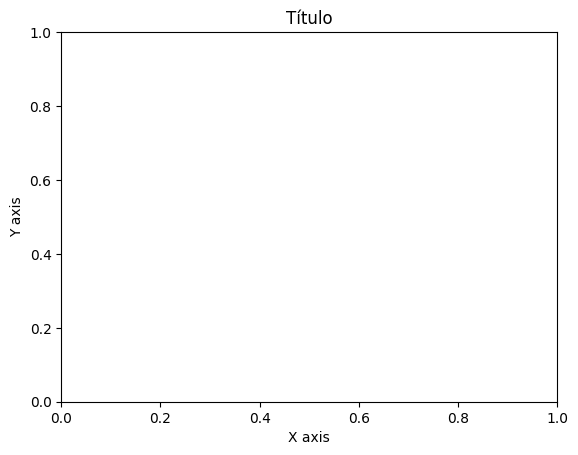

In [ ]:
plt.title('Título')
plt.xlabel('X axis')
plt.ylabel('Y axis')

In [ ]:
laptopData.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

Al tener solo dos columnas númericas Unnamed: 0 y Price, voy a empezar con las categóricas. Para ello, voy a emplear una función que me permita ver los diferentes valores de las variables y así tratar de ver qué valores me pueden aportar más valor.

In [ ]:
def unique_values_and_types(laptopData):
    df = laptopData
    # Lista para almacenar los resultados
    results = []

    # Itero cada columna para obtener los valores únicos y el tipo de dato
    for col in df.columns:

        # valores únicos de la columna
        unique_values = df[col].unique()

        # Contar el número de valores únicos
        num_unique = len(unique_values)

        # tipo de dato de la columna
        data_type = df[col].dtype

        # Agregar los resultados a la lista
        results.append({
            'Column': col,
            'Data_Type': data_type,

            'Nº de valores ÚNICOS': num_unique,

            'Unique Values': unique_values
        })

    # Convierto la lista de resultados en un DataFrame
    unique_df = pd.DataFrame(results)

    # Filtro  para obtener solo las columnas categóricas
    categorical_columns = unique_df[unique_df['Data_Type'] == 'object']

    # Convierto el DataFrame a una cadena para poder verlo mejor
    # fuente: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html

    unique_df_string = unique_df.to_string()
    categorical_columns_string = categorical_columns.to_string()


    return unique_df_string, categorical_columns_string

In [ ]:
unique_df, unique_categorical_columns = unique_values_and_types(laptopData)
print(unique_df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(unique_categorical_columns)

              Column Data_Type  Nº de valores ÚNICOS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Al parecer hay valores que deben ser modificados, como
- ? en inches y weight.
- nan en ram y en TypeName.

También, de cara a la visualización voy a visualizar los datos categóricos que tienen menos valores únicos tienen.


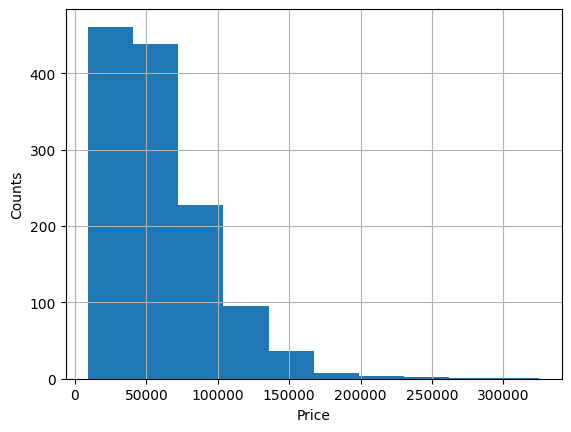

In [ ]:
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title("")

laptopData["Price"].hist()
plt.show()

Se ve una gran frecuencia entrre 1000 y 7000.

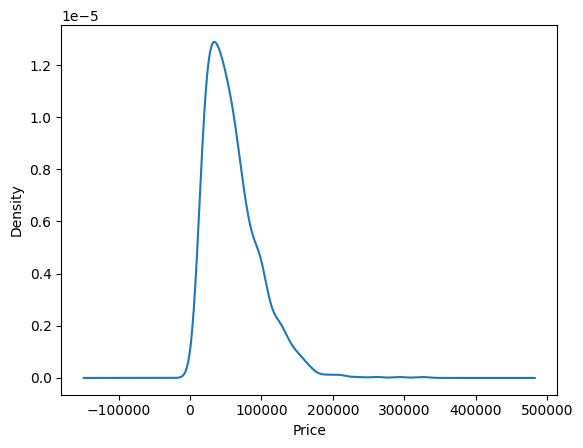

In [ ]:
plt.xlabel('Price')
laptopData["Price"].plot(kind='density')
plt.show()

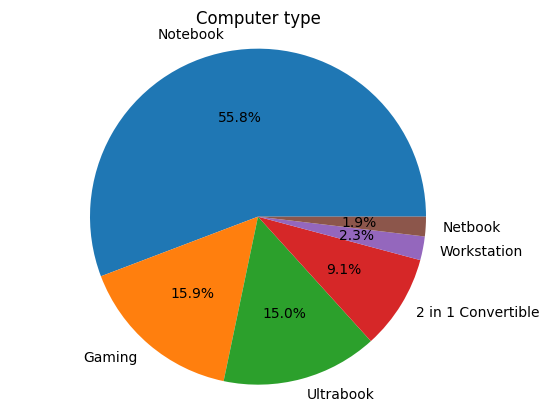

In [ ]:
clarity_counts = laptopData['TypeName'].value_counts()

plt.title("Computer type")
plt.pie(clarity_counts, labels=clarity_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Asegura que el gráfico sea un círculo en lugar de una elipse
plt.show()


Por lo visto, más de la mitad son Notebook. Por lo qué cabe la posibilidad que afecte al precio.



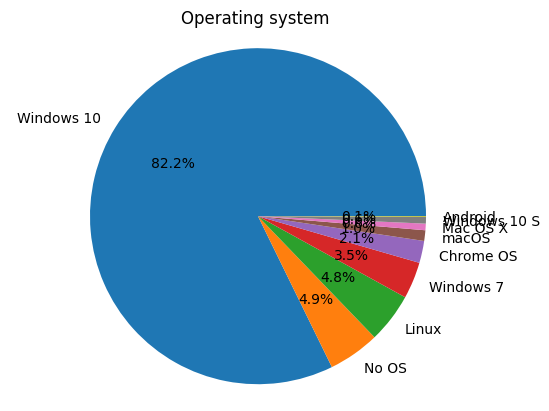

In [ ]:
clarity_counts = laptopData['OpSys'].value_counts()

plt.title("Operating system ")
plt.pie(clarity_counts, labels=clarity_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()



AL igual que el anterior, hay una gran diferencia del uso de Windows 10 respecto al resto de SO. Esto puede ser bueno o malo, ya que el modelo puede aprender muy bien de Windows pero quizás peor de apple porque no hay tantos datos.

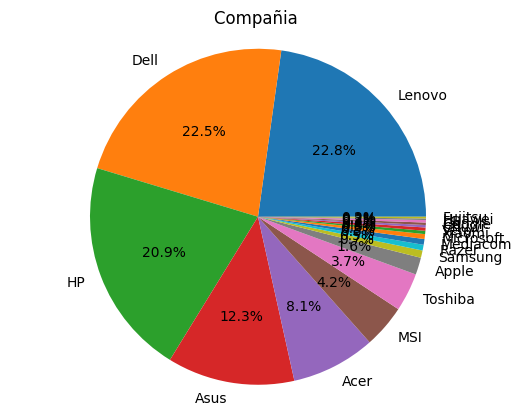

In [ ]:
clarity_counts = laptopData['Company'].value_counts()

plt.title("Compañia ")
plt.pie(clarity_counts, labels=clarity_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()




Respecto a los pie-charts anteriores se puede ver mayor variedad lo que nos puede beneficiar. Quizás, los datos que son menores de un 4% se podrían eliminar posteriormente.

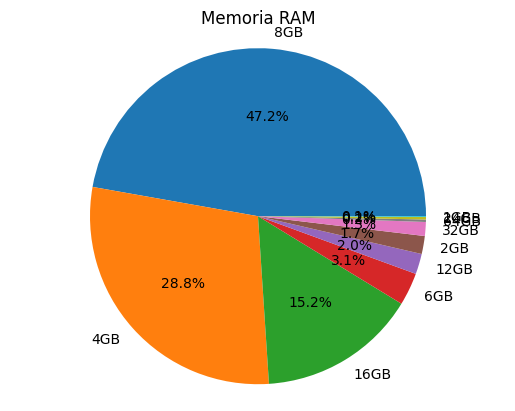

In [ ]:
clarity_counts = laptopData['Ram'].value_counts()

plt.title("Memoria RAM")
plt.pie(clarity_counts, labels=clarity_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


Viendo que hay 3 destacadas voy a mirar si hay alguna correlación con el tipo de ordenador.

<Axes: xlabel='Ram', ylabel='count'>

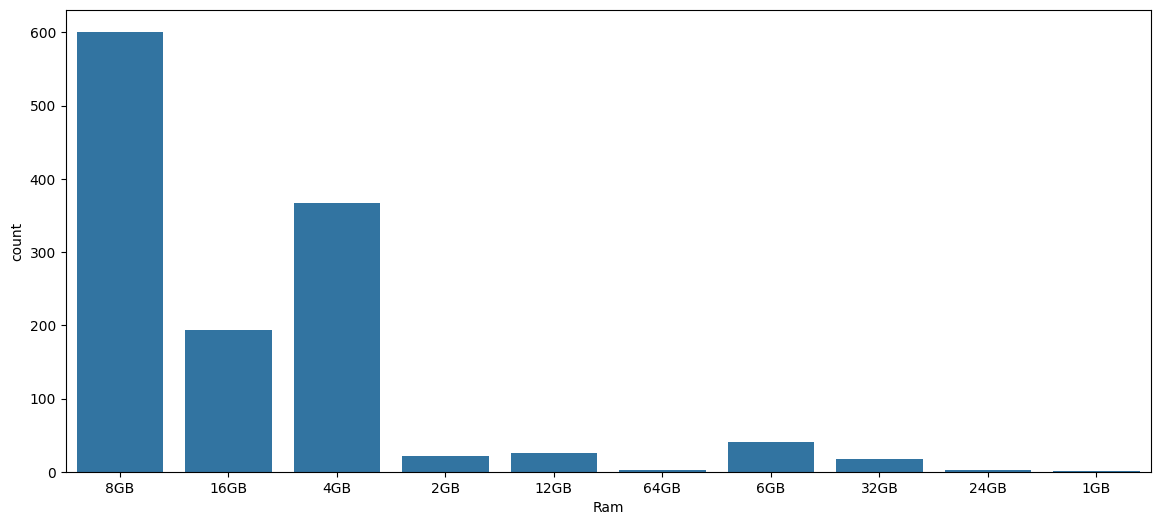

In [ ]:
plt.figure(figsize=(14, 6)) # le cambio el tamaño para que se aprecie mejor
sns.countplot(laptopData, x="Ram")

<Axes: xlabel='Ram', ylabel='count'>

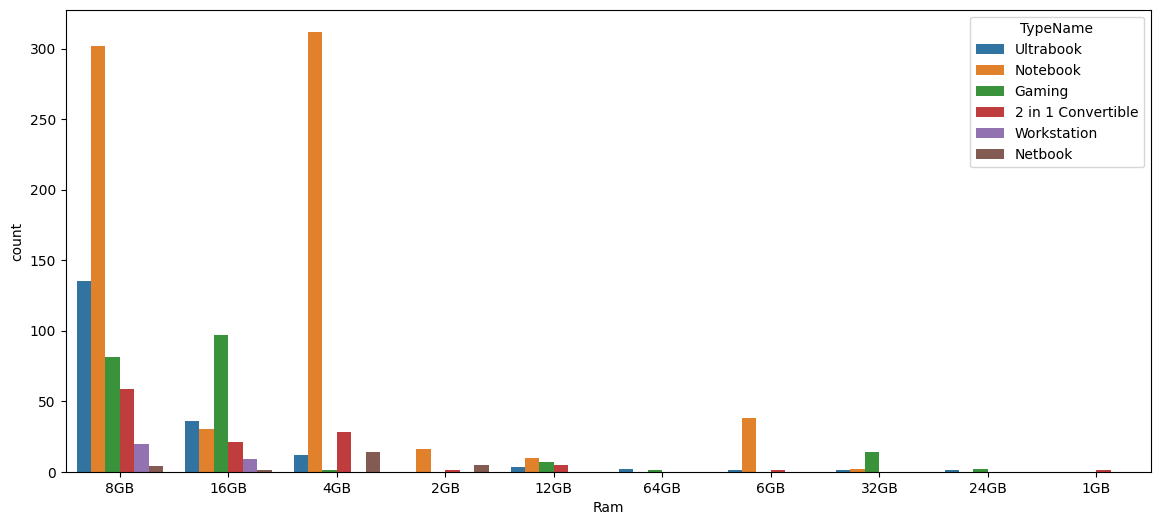

In [ ]:
plt.figure(figsize=(14, 6)) # le cambio el tamaño para que se aprecie mejor
sns.countplot(laptopData, x="Ram", hue="TypeName")

Al parecer los notebook requieren de menos capacidades de RAM que los Gaming.
Los Ultrabook mínimo necesitan 8GB de RAM al igual que los Gaming.


## VISUALIZACIÓN DE CLEANED DATA

In [ ]:
def unique_values_and_types(Cleaned_Laptop_data):
    df = Cleaned_Laptop_data
    # Lista para almacenar los resultados
    results = []

    # Itero cada columna para obtener los valores únicos y el tipo de dato
    for col in df.columns:

        # valores únicos de la columna
        unique_values = df[col].unique()

        # Contar el número de valores únicos
        num_unique = len(unique_values)

        # tipo de dato de la columna
        data_type = df[col].dtype

        # Agregar los resultados a la lista
        results.append({
            'Column': col,
            'Data_Type': data_type,

            'Nº de valores ÚNICOS': num_unique,

            'Unique Values': unique_values
        })

    # Convierto la lista de resultados en un DataFrame
    unique_df = pd.DataFrame(results)

    # Filtro  para obtener solo las columnas categóricas
    categorical_columns = unique_df[unique_df['Data_Type'] == 'object']

    # Convierto el DataFrame a una cadena para poder verlo mejor
    # fuente: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html

    unique_df_string = unique_df.to_string()
    categorical_columns_string = categorical_columns.to_string()


    return unique_df_string, categorical_columns_string

In [ ]:
unique_df, unique_categorical_columns = unique_values_and_types(Cleaned_Laptop_data)
print(unique_df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(unique_categorical_columns)

             Column Data_Type  Nº de valores ÚNICOS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique Values
0             brand    object                    21                                                                                                                                                      

Lo que veo respecto a los datos anteriores es que

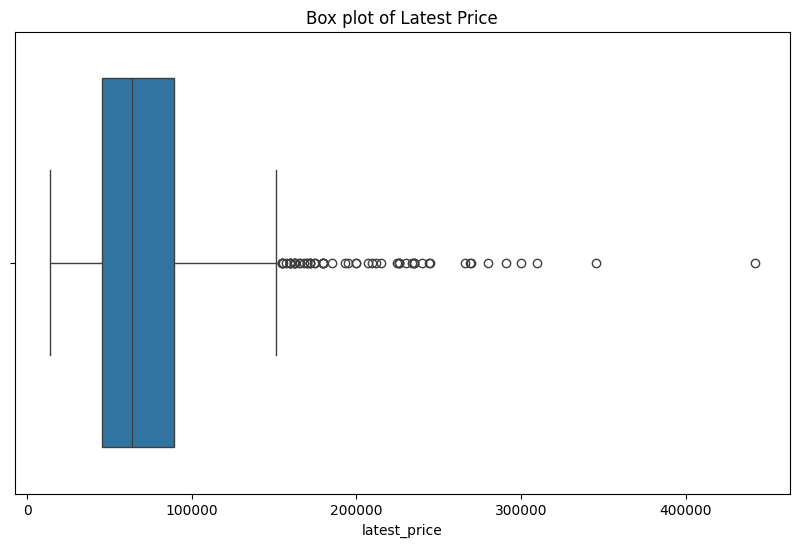

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Cleaned_Laptop_data['latest_price'])
plt.title('Box plot of Latest Price')
plt.show()

Se observa  que la mayoría de los precios se encuentran entre 0 y 10000, mientras que el resto los considerariamos outliers.

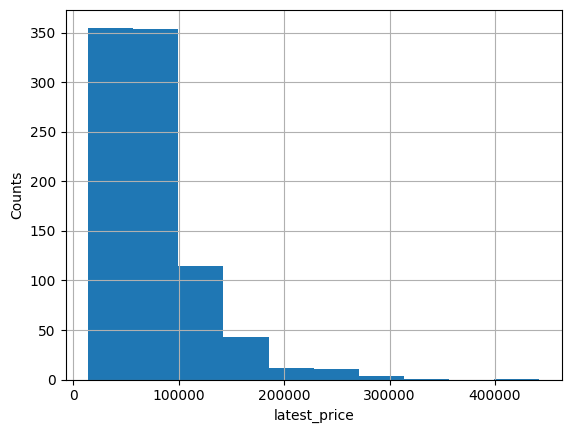

In [ ]:
plt.xlabel('latest_price')
plt.ylabel('Counts')
plt.title("")

Cleaned_Laptop_data["latest_price"].hist()
plt.show()

La mayoría de los ordenadores se encuentran entre un 10000 y 100000.

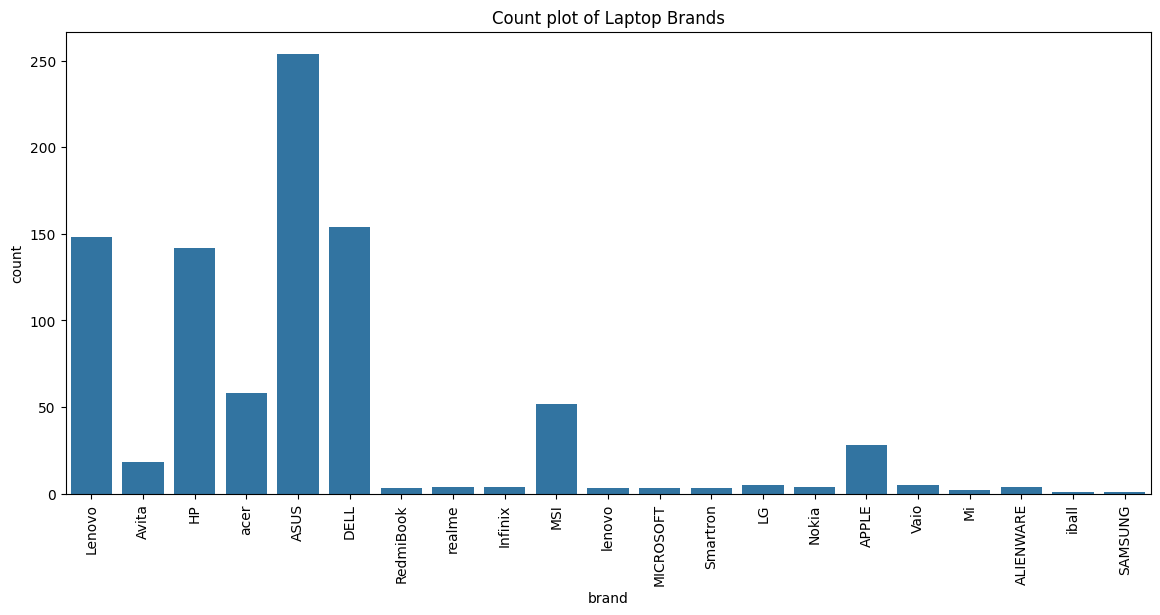

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x=Cleaned_Laptop_data['brand'])
plt.title('Count plot of Laptop Brands')
plt.xticks(rotation=90)
plt.show()

Se ve que hay una gran frecuencia del uso de
- ASUS
- DELL
- Lenovo
- acer
- MSI
- APPLE

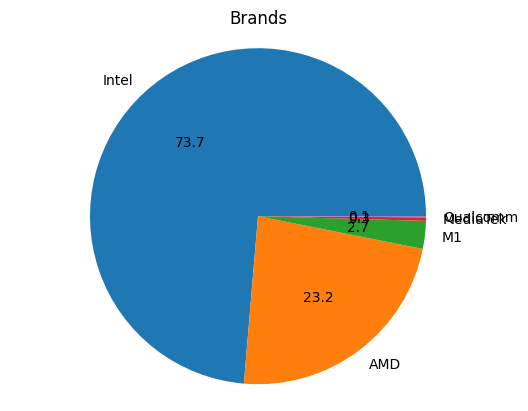

In [ ]:
brand_counts = Cleaned_Laptop_data['processor_brand'].value_counts()

plt.title('Brands')
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f')
plt.axis('equal')
plt.show()

Respecto a la marca de procesadores hay un claro uso de Intel.


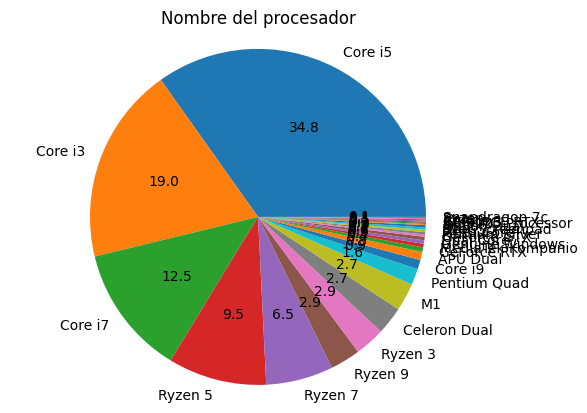

In [ ]:
brand_counts = Cleaned_Laptop_data['processor_name'].value_counts()

plt.title('Nombre del procesador')
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f')
plt.axis('equal')
plt.show()

Respecto al nombre de los procesadores hay variedad de usos. Quizás solo nos interesen los mayores al 6%.

## Preparación de Datos para hacer el Merge


### Renombrar columnas

- Fuente: [Cambio de columna](https://www.kdnuggets.com/2022/11/4-ways-rename-pandas-columns.html)

In [ ]:
laptopData.rename(columns={"Company": "brand"}, inplace=True)


In [ ]:
laptopData.head()


,Unnamed: 0,brand,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
laptopData.rename(columns={"Inches": "display_size"}, inplace=True)

In [ ]:
laptopData.rename(columns={"OpSys": "os"}, inplace=True)

In [ ]:
laptopData['Memory'].value_counts()

256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

Al tener muchos valores con ssd y hdd voy a crear dos columnas e insertar los valores de la tabla Memoria.

[Fuente](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/)

In [ ]:
laptopData['ssd'] = 0

In [ ]:
laptopData['hdd'] = 0

In [ ]:
laptopData.head()

,Unnamed: 0,brand,TypeName,display_size,ScreenResolution,Cpu,Ram,Memory,Gpu,os,Weight,Price,ssd,hdd
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,0
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,0
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,0


Cómo necesito convertir a la misma unidad de medida.
Fuentes:
- [strip](https://www.w3schools.com/python/ref_string_strip.asp)


In [ ]:
def cambio_gb(capacity):

    capacity = capacity.split()[0]  # Extraer solo el número

    if 'TB' in capacity:
        return int(float(capacity.replace('TB', '').strip()) * 1024)
    elif 'GB' in capacity:
        return int(capacity.replace('GB', '').strip())
    else:
        return 0  # En caso de que no se especifique la unidad

In [ ]:
def actualizar_memoria(row):

    memory = row['Memory']

    if pd.isna(memory) or memory == '?': # en caso de que el valor de la fila sea nada o ?
        return row

    # Extracción de la capacidad y tipo de almacenamiento
    for part in memory.split('+'):

        part = part.strip()

        if 'SSD' in part or 'Flash Storage' in part or 'Hybrid' in part:

            row['ssd'] += cambio_gb(part)

        elif 'HDD' in part:

            row['hdd'] += cambio_gb(part)


    return row

In [ ]:
laptopData = laptopData.apply(actualizar_memoria, axis=1)

In [ ]:
laptopData.head()

,Unnamed: 0,brand,TypeName,display_size,ScreenResolution,Cpu,Ram,Memory,Gpu,os,Weight,Price,ssd,hdd
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,0
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128,0
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256,0
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512,0
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256,0


In [ ]:
Cleaned_Laptop_data['processor_gnrtn'].value_counts()

11th       346
10th       246
Missing    239
8th         43
7th         12
9th          6
12th         3
4th          1
Name: processor_gnrtn, dtype: int64

In [ ]:
Cleaned_Laptop_data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [ ]:
laptopData['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: Cpu, Length: 118, dtype: int64

### Normalización de datos LaptopData
Separo los datos de la columna del procesador en la marca.


In [ ]:
# Fuente https://stackoverflow.com/questions/37504672/pandas-dataframe-return-first-word-in-string-for-column

# Extraer la primera palabra de cada fila en la columna 'CPU'
first_words = laptopData['Cpu'].str.split().str[0].unique()

print(first_words)


['Intel' 'AMD' nan 'Samsung']


Función obtenida del siguiente prompt
```
necesito es crear dos columnas, processor_brand	processor_name	. Añadir la información correspondientes teniendo en cuenta que los datos de la columna cpu contiene Marca del procesador, nombre del procesador, generación, modelo específico y señal de reloj.
Por ejemplo:
Intel Core i7 6500U 2.5GHz

Cambiar a
processor_brand	Intel
processor_name	   Core i5
```

In [ ]:
def extract_processor_brand_name(cpu):

    if not isinstance(cpu, str):
        return None, None

    brand, name = None, None

    # Extraer la marca
    if 'Intel' in cpu:
        brand = 'Intel'
    elif 'AMD' in cpu:
        brand = 'AMD'

    # Extraer el nombre del procesador
    if brand == 'Intel':
        name_parts = [part for part in cpu.split() if 'Core' in part or part.startswith('i')]
        if name_parts:
            name = ' '.join(name_parts[:2])  # Ejemplo: 'Core i7'
    elif brand == 'AMD':
        if 'Ryzen' in cpu:
            name_parts = cpu.split()
            ryzen_index = name_parts.index('Ryzen')
            if ryzen_index + 1 < len(name_parts):
                name = 'Ryzen ' + name_parts[ryzen_index + 1]  # Ejemplo: 'Ryzen 5'

    elif brand =='Samsung':
        name_parts
        if len(name_parts) > 1:
          name = ''.join(name_parts)


    return brand, name

# Aplicar la función y crear las nuevas columnas
laptopData['processor_brand'], laptopData['processor_name'] = zip(*laptopData['Cpu'].apply(extract_processor_brand_name))

In [ ]:
laptopData.tail()

,Unnamed: 0,brand,TypeName,display_size,ScreenResolution,Cpu,Ram,Memory,Gpu,os,Weight,Price,ssd,hdd,processor_brand,processor_name
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64,128,0,Intel,Core i7
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72,512,0,Intel,Core i7
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12,64,0,Intel,Core
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92,0,1024,Intel,Core i7
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32,0,500,Intel,Core


In [ ]:
Cleaned_Laptop_data.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [ ]:
Cleaned_Laptop_data['graphic_card_gb'].value_counts()

0    631
4    138
2     69
6     40
8     18
Name: graphic_card_gb, dtype: int64

In [ ]:
laptopData['TypeName'].value_counts()

Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: TypeName, dtype: int64

In [ ]:
laptopData.rename(columns={"Ram": "ram_gb"}, inplace=True)

In [ ]:
Cleaned_Laptop_data.rename(columns={"latest_price": "Price"}, inplace=True)

In [ ]:
laptopData.drop('Unnamed: 0', axis=1, inplace =True)

In [ ]:
laptopData.head()

,brand,TypeName,display_size,ScreenResolution,Cpu,ram_gb,Memory,Gpu,os,Weight,Price,ssd,hdd,processor_brand,processor_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,0,Intel,Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128,0,Intel,Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256,0,Intel,Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512,0,Intel,Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256,0,Intel,Core i5


### Normalización de datos de Cleaned_Laptop_Data
Fuente de [re](https://www.w3schools.com/python/python_regex.asp)

In [ ]:
Cleaned_Laptop_data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,Price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [ ]:
Cleaned_Laptop_data.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
Price              0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

Prompt para obtener la función
```
Tengo los siguientes datasets.
en laptopData los datos en una columna llamada Memory como 128GB SSD con esa remoción consigo que se pongan correctamente. Sin embargo, tengo que aplicarlo en Cleaned_Laptop_data también
```


In [ ]:
import re # es para poder manipular datos de texto https://www.w3schools.com/python/python_regex.asp
def limpieza_datos_memoria(storage_str):

    if isinstance(storage_str, str): # comprobación de que se trata de una cadena de texto

        # Extraer el número y convertirlo a entero

        amount = re.findall(r'(\d+)', storage_str) # devuelve una lista con todas las concurrencias encontradas

        return int(amount[0]) if amount else 0
    else:
        # Devolver 0 si no es un string
        return 0


In [ ]:
Cleaned_Laptop_data['ssd'] = Cleaned_Laptop_data['ssd'].apply(limpieza_datos_memoria)
Cleaned_Laptop_data['hdd'] = Cleaned_Laptop_data['hdd'].apply(limpieza_datos_memoria)


In [ ]:
Cleaned_Laptop_data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,Price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0,1024,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0,512,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128,0,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128,0,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256,0,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


## MERGE + EDA
Como ya sé que columnas voy a utilizar para hacer el análisis, voy a implementar la outer join para controlar los datos mejor.


In [ ]:
Cleaned_Laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  Price           

In [ ]:
laptopData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   display_size      1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   ram_gb            1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   os                1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
 11  ssd               1303 non-null   int64  
 12  hdd               1303 non-null   int64  
 13  processor_brand   1272 non-null   object 
 14  processor_name    1199 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 152.8+ KB


In [ ]:
# como tienen diferentes tipos de datos no me deja hacer el Merge por lo que utilizare el sigueinte comando
Cleaned_Laptop_data['Price'] = Cleaned_Laptop_data['Price'].astype(float)

In [ ]:
df = pd.merge(Cleaned_Laptop_data, laptopData, how='outer')

In [ ]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,discount,star_rating,ratings,reviews,TypeName,ScreenResolution,Cpu,Memory,Gpu,Weight
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0,1024,Windows,...,23.0,3.7,63.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0,512,Windows,...,8.0,3.6,1894.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128,0,Windows,...,28.0,3.7,1153.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128,0,Windows,...,23.0,3.7,1153.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256,0,Windows,...,25.0,3.7,1657.0,234.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 0 to 2198
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             2169 non-null   object 
 1   model             896 non-null    object 
 2   processor_brand   2168 non-null   object 
 3   processor_name    2095 non-null   object 
 4   processor_gnrtn   896 non-null    object 
 5   ram_gb            2169 non-null   object 
 6   ram_type          896 non-null    object 
 7   ssd               2199 non-null   int64  
 8   hdd               2199 non-null   int64  
 9   os                2169 non-null   object 
 10  os_bit            896 non-null    object 
 11  graphic_card_gb   896 non-null    float64
 12  weight            896 non-null    object 
 13  display_size      2169 non-null   object 
 14  warranty          896 non-null    float64
 15  Touchscreen       896 non-null    object 
 16  msoffice          896 non-null    object 


In [ ]:
df.shape

(2199, 29)

In [ ]:
laptopData.shape

(1303, 15)

In [ ]:
Cleaned_Laptop_data.shape

(896, 23)

De esta manera confirmo que los datos coinciden y que no ha habido ningún problema.


In [ ]:
df.nunique()

brand                 36
model                117
processor_brand        5
processor_name        30
processor_gnrtn        8
ram_gb                14
ram_type               6
ssd                   17
hdd                    7
os                    12
os_bit                 2
graphic_card_gb        5
weight                 3
display_size          34
warranty               4
Touchscreen            2
msoffice               2
Price               1206
old_price            564
discount              48
star_rating           30
ratings              310
reviews              152
TypeName               6
ScreenResolution      40
Cpu                  118
Memory                40
Gpu                  110
Weight               189
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ssd,2199.0,290.446567,281.141497,0.00,12.0,256.0,512.00,3072.0
hdd,2199.0,337.658936,489.680914,0.00,0.0,0.0,1024.00,2048.0
graphic_card_gb,896.0,1.198661,2.057454,0.00,0.0,0.0,2.00,8.0
warranty,896.0,0.691964,0.606282,0.00,0.0,1.0,1.00,3.0
Price,2169.0,66711.565844,42184.846362,9270.72,38990.0,57990.0,82990.00,441990.0
old_price,896.0,88134.154018,55719.645554,0.00,54940.5,78052.5,111019.50,377798.0
discount,896.0,18.527902,10.508486,0.00,11.0,19.0,26.00,57.0
star_rating,896.0,2.980469,1.965254,0.00,0.0,4.1,4.40,5.0
ratings,896.0,367.391741,1106.309355,0.00,0.0,19.0,179.50,15279.0
reviews,896.0,46.152902,136.079586,0.00,0.0,3.0,23.25,1947.0


In [ ]:
df.isnull().sum()

brand                 30
model               1303
processor_brand       31
processor_name       104
processor_gnrtn     1303
ram_gb                30
ram_type            1303
ssd                    0
hdd                    0
os                    30
os_bit              1303
graphic_card_gb     1303
weight              1303
display_size          30
warranty            1303
Touchscreen         1303
msoffice            1303
Price                 30
old_price           1303
discount            1303
star_rating         1303
ratings             1303
reviews             1303
TypeName             926
ScreenResolution     926
Cpu                  926
Memory               926
Gpu                  926
Weight               926
dtype: int64

Viendo estos valores, posteriormente **eliminaría os_bit**, **graphic_card_gb** **modelo**, **processor_gnrt**, **ram_type**, **os_bit**, **graphic_card_usb**, **warranty**, **Touchscreen**, **old_price**, **discount**, **star_rating**,..... ya que tienen 1303 nulos y si tengo solo 2000 filas no me aporta valor.


### VISUALIZACIÓN DE DATOS

In [ ]:
unique_df, unique_categorical_columns = unique_values_and_types(df)
print(unique_df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(unique_categorical_columns)

              Column Data_Type  Nº de valores ÚNICOS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

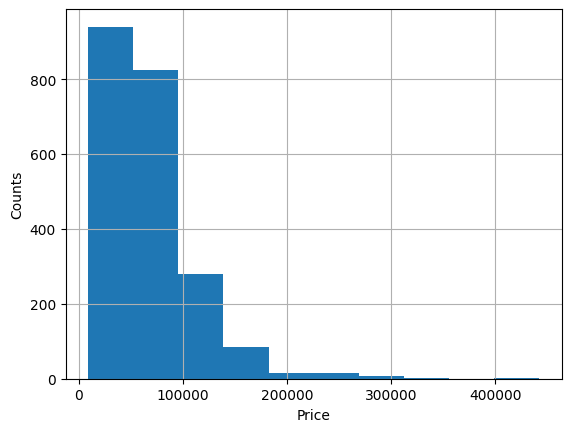

In [ ]:
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title("")

df["Price"].hist()
plt.show()

EL histograma muestra que la frecuencia del precio se encuentra entre

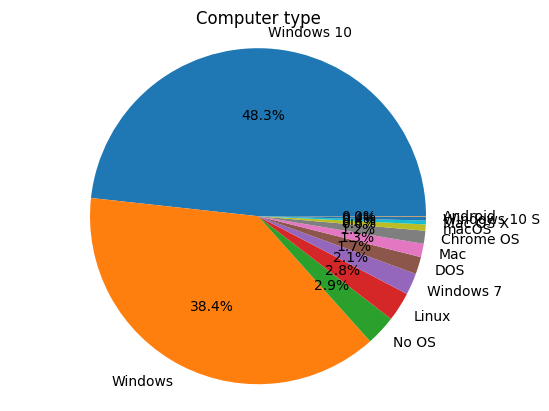

In [ ]:
clarity_counts = df['os'].value_counts()

plt.title("Computer type")
plt.pie(clarity_counts, labels=clarity_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Asegura que el gráfico sea un círculo en lugar de una elipse
plt.show()


El 90% de los ordenadores emplean un sistema operativo Windows, como en el dataframe de Cleaned_Laptop_data simplemente solo pone Windows y no el número seguramente luego haya que normalizar los valores.


<Axes: xlabel='ram_gb', ylabel='count'>

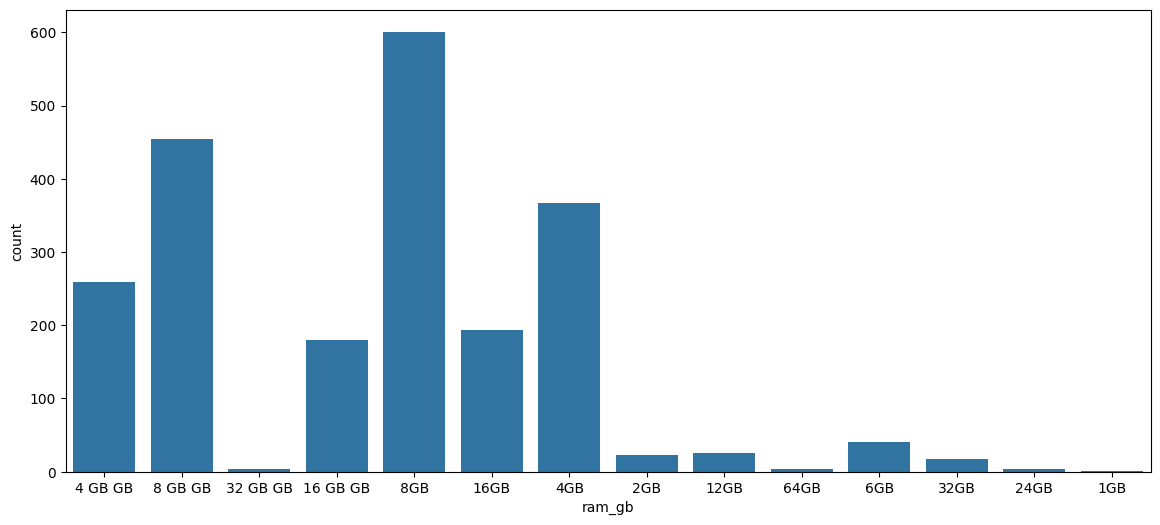

In [ ]:
plt.figure(figsize=(14, 6)) # le cambio el tamaño para que se aprecie mejor
sns.countplot(df, x="ram_gb")

Lo que veo es que al igual que en el anterior gráfico en el Feature Engineering voy a tener que cambiar ciertos valores porque aparecen 8 GB y 8 GB GB por separado cuando significan lo mismo.

<Axes: xlabel='display_size', ylabel='count'>

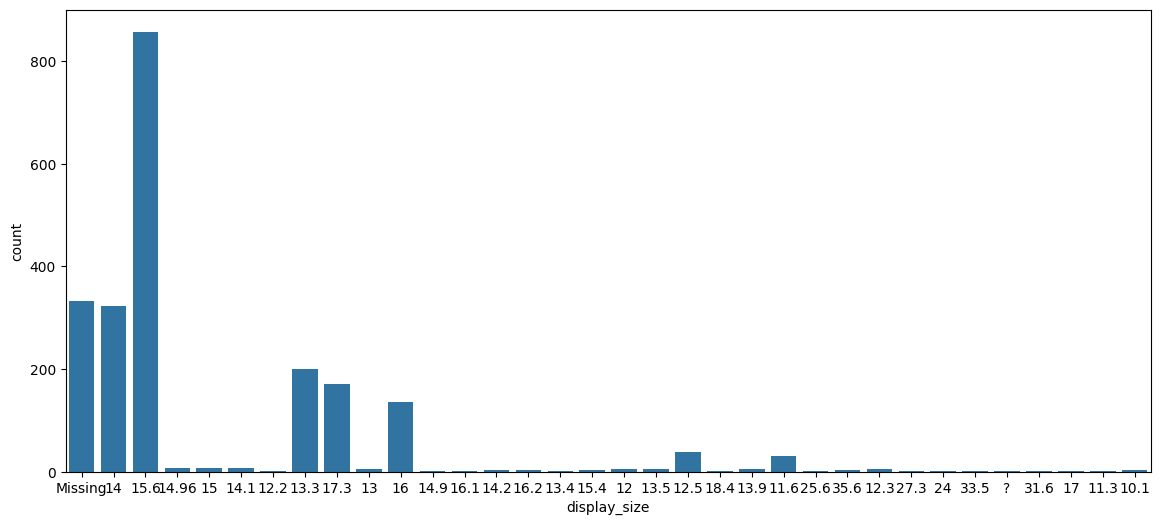

In [ ]:
plt.figure(figsize=(14, 6)) # le cambio el tamaño para que se aprecie mejor
sns.countplot(df, x="display_size")

Al parecer hay unos 300 valores que faltan por añadir por lo que luego tendré qu eliminarlos.

<Axes: xlabel='os', ylabel='count'>

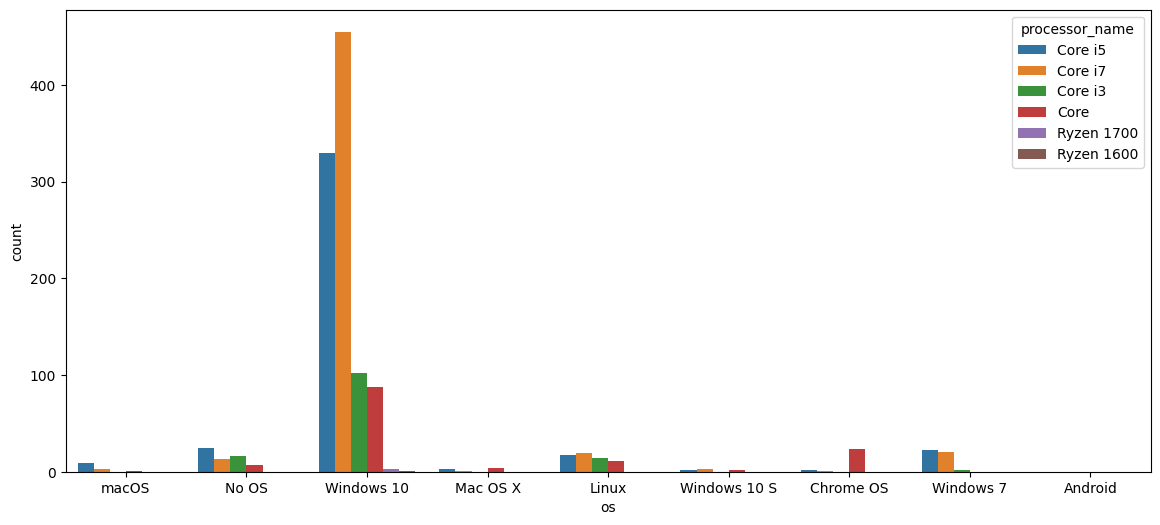

In [ ]:
plt.figure(figsize=(14, 6)) # le cambio el tamaño para que se aprecie mejor
sns.countplot(laptopData, x="os", hue="processor_name")

Al tener pocos valores que no sean Windows el resto de ordenadores no muestran grandes repeticiones. Sin embargo, se ve que el procesador i7 es el más utilizado.

## FEAUTURE ENGINEERING

In [ ]:
def unique_values_and_types(df):

    # Lista para almacenar los resultados
    results = []

    # Itero cada columna para obtener los valores únicos y el tipo de dato
    for col in df.columns:

        # valores únicos de la columna
        unique_values = df[col].unique()

        # Contar el número de valores únicos
        num_unique = len(unique_values)

        # tipo de dato de la columna
        data_type = df[col].dtype

        # Agregar los resultados a la lista
        results.append({
            'Column': col,
            'Data_Type': data_type,

            'Nº de valores ÚNICOS': num_unique,

            'Unique Values': unique_values
        })

    # Convierto la lista de resultados en un DataFrame
    unique_df = pd.DataFrame(results)

    # Filtro  para obtener solo las columnas categóricas
    categorical_columns = unique_df[unique_df['Data_Type'] == 'object']

    # Convierto el DataFrame a una cadena para poder verlo mejor
    # fuente: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html

    unique_df_string = unique_df.to_string()
    categorical_columns_string = categorical_columns.to_string()


    return unique_df_string, categorical_columns_string


In [ ]:
unique_df, unique_categorical_columns = unique_values_and_types(df)
print(unique_df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(unique_categorical_columns)

              Column Data_Type  Nº de valores ÚNICOS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Con esta función veo los valores atípicos como ?, que esta en weight y memoria, y nan.


In [ ]:
df.isnull().sum()

brand                 30
model               1303
processor_brand       31
processor_name       104
processor_gnrtn     1303
ram_gb                30
ram_type            1303
ssd                    0
hdd                    0
os                    30
os_bit              1303
graphic_card_gb     1303
weight              1303
display_size          30
warranty            1303
Touchscreen         1303
msoffice            1303
Price                 30
old_price           1303
discount            1303
star_rating         1303
ratings             1303
reviews             1303
TypeName             926
ScreenResolution     926
Cpu                  926
Memory               926
Gpu                  926
Weight               926
dtype: int64

In [ ]:
df.isna().sum()

brand                 30
model               1303
processor_brand       31
processor_name       104
processor_gnrtn     1303
ram_gb                30
ram_type            1303
ssd                    0
hdd                    0
os                    30
os_bit              1303
graphic_card_gb     1303
weight              1303
display_size          30
warranty            1303
Touchscreen         1303
msoffice            1303
Price                 30
old_price           1303
discount            1303
star_rating         1303
ratings             1303
reviews             1303
TypeName             926
ScreenResolution     926
Cpu                  926
Memory               926
Gpu                  926
Weight               926
dtype: int64

Como quiero eliminar los duplicados procedo a eliminar las columnas que no me interesan.

In [ ]:
df.drop('model', axis=1, inplace=True)

df.drop('processor_gnrtn', axis=1, inplace=True)
df.drop('ram_type', axis=1, inplace=True)
df.drop('os_bit', axis=1, inplace=True)
df.drop('graphic_card_gb', axis=1, inplace=True)

df.drop('warranty', axis=1, inplace=True)
df.drop('Touchscreen', axis=1, inplace=True)
df.drop('msoffice', axis=1, inplace=True)

df.drop('old_price', axis=1, inplace=True)
df.drop('discount', axis=1, inplace=True)
df.drop('star_rating', axis=1, inplace=True)
df.drop('ratings', axis=1, inplace=True)
df.drop('reviews', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)

df.drop('TypeName', axis=1, inplace=True)
df.drop('ScreenResolution', axis=1, inplace=True)
df.drop('Cpu', axis=1, inplace=True)
df.drop('Memory', axis=1, inplace=True)
df.drop('Gpu', axis=1, inplace=True)



In [ ]:
df.drop('Weight', axis=1, inplace=True)

In [ ]:
laptopData.tail()

,brand,TypeName,display_size,ScreenResolution,Cpu,ram_gb,Memory,Gpu,os,Weight,Price,ssd,hdd,processor_brand,processor_name
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64,128,0,Intel,Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72,512,0,Intel,Core i7
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12,64,0,Intel,Core
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92,0,1024,Intel,Core i7
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32,0,500,Intel,Core


In [ ]:
Cleaned_Laptop_data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,Price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0,1024,Windows,...,Missing,0,No,No,24990.0,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0,512,Windows,...,Missing,0,No,No,19590.0,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128,0,Windows,...,Missing,0,No,No,19990.0,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128,0,Windows,...,Missing,0,No,No,21490.0,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256,0,Windows,...,Missing,0,No,No,24990.0,33490,25,3.7,1657,234


In [ ]:
df.tail()

,brand,processor_brand,processor_name,ram_gb,ssd,hdd,os,display_size,Price
2194,Lenovo,Intel,Core,2GB,64,0,Windows 10,14,12201.12
2195,Lenovo,Intel,Core,2GB,64,0,Windows 10,14,12201.12
2196,HP,Intel,Core i7,6GB,0,1024,Windows 10,15.6,40705.92
2197,HP,Intel,Core i7,6GB,0,1024,Windows 10,15.6,40705.92
2198,HP,Intel,Core i7,6GB,0,1024,Windows 10,15.6,40705.92


In [ ]:
df.duplicated().sum()

122

In [ ]:
df.isnull().sum()

brand               30
processor_brand     31
processor_name     104
ram_gb              30
ssd                  0
hdd                  0
os                  30
display_size        30
Price               30
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2077, 9)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()


brand              0
processor_brand    0
processor_name     0
ram_gb             0
ssd                0
hdd                0
os                 0
display_size       0
Price              0
dtype: int64

In [ ]:
df.shape

(2004, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
unique_df, unique_categorical_columns = unique_values_and_types(df)
print(unique_df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(unique_categorical_columns)

            Column Data_Type  Nº de valores ÚNICOS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique Values
0            brand    object              

In [ ]:
# reutilizo la función anterior de eliminación de GB
df['ram_gb'] = df['ram_gb'].apply(limpieza_datos_memoria)

In [ ]:
df.head()

,brand,processor_brand,processor_name,ram_gb,ssd,hdd,os,display_size,Price
0,Lenovo,AMD,A6-9225 Processor,4,0,1024,Windows,Missing,24990.0
1,Lenovo,AMD,APU Dual,4,0,512,Windows,Missing,19590.0
2,Avita,AMD,APU Dual,4,128,0,Windows,Missing,19990.0
3,Avita,AMD,APU Dual,4,128,0,Windows,Missing,21490.0
4,Avita,AMD,APU Dual,4,256,0,Windows,Missing,24990.0


Elimino valores atípicos mencionados anteriormente.

In [ ]:
df.isna().sum()

brand              0
processor_brand    0
processor_name     0
ram_gb             0
ssd                0
hdd                0
os                 0
display_size       0
Price              0
dtype: int64

Ahora al tener diferentes sistemas operativos voy a ver los diferentes valores que hay.

In [ ]:
df['os'].value_counts()

Windows 10      951
Windows         780
No OS            61
Linux            57
Windows 7        44
DOS              35
Chrome OS        26
Mac              22
macOS            13
Mac OS X          8
Windows 10 S      7
Name: os, dtype: int64

In [ ]:
Cleaned_Laptop_data['os'].value_counts()

Windows    832
DOS         36
Mac         28
Name: os, dtype: int64

In [ ]:
# voy a normalizar los valores

In [ ]:
df['os'] = df['os'].str.replace('Windows 10', 'Windows')
df['os'] = df['os'].str.replace('Windows 7', 'Windows')
df['os'] = df['os'].str.replace('Windows 10 S', 'Windows')

df['os'] = df['os'].str.replace('macOS', 'Mac')
df['os'] = df['os'].str.replace('Mac', 'Mac')
df['os'] = df['os'].str.replace('Mac OS X', 'Mac')

### *OUTLIERS*

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ram_gb,2004.0,8.621257,5.160409,1.00,4.00,8.0000,8.00,64.0
ssd,2004.0,299.435130,282.105981,0.00,32.00,256.0000,512.00,3072.0
hdd,2004.0,342.015968,490.956408,0.00,0.00,0.0000,1024.00,2048.0
Price,2004.0,68320.558758,42022.775453,9270.72,40427.14,58581.0936,85027.86,441990.0


In [ ]:
import numpy as np

In [ ]:
def outlier_treatment(datacolumn):
 sorted_data = sorted(datacolumn)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 Q1,Q3 = np.nanpercentile(datacolumn , [25,75]) # Solo si no has eliminado los valores nulos ...
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lower_limit, upper_limit = outlier_treatment(df['ssd'])

# Detectar outliers
outliers = df[(df['ssd'] < lower_limit) | (df['ssd'] > upper_limit)]

# Contar los outliers
num_outliers = len(outliers)

# Mostrar resultados
print(f"Límite inferior: {lower_limit}")
print(f"Límite superior: {upper_limit}")
print(f"Número de outliers: {num_outliers}")


Límite inferior: -688.0
Límite superior: 1232.0
Número de outliers: 5


In [ ]:
df.drop(df[(df['ssd']> upper_limit)|(df['ssd']<lower_limit)].index, inplace=True) #elimino los valores

In [ ]:
lower_limit, upper_limit = outlier_treatment(df['Price'])

outliers = df[(df['Price'] < lower_limit) | (df['Price'] > upper_limit)]

# Contar los outliers
num_outliers = len(outliers)

# Mostrar resultados
print(f"Límite inferior: {lower_limit}")
print(f"Límite superior: {upper_limit}")
print(f"Número de outliers: {num_outliers}")

Límite inferior: -26714.500000000015
Límite superior: 152012.7
Número de outliers: 77


In [ ]:
print(outliers)

       brand processor_brand processor_name  ram_gb   ssd   hdd       os  \
352    APPLE           Intel        Core i5       8   512     0      Mac   
353    APPLE           Intel        Core i5       8   512     0      Mac   
403   lenovo           Intel        Core i5       8     0   512      DOS   
447    APPLE           Intel        Core i5      16  1024     0      Mac   
454   Lenovo           Intel        Core i5       8   512   512  Windows   
...      ...             ...            ...     ...   ...   ...      ...   
1918  Lenovo           Intel        Core i7      16   512     0  Windows   
1966    Asus           Intel        Core i7      64  1024     0  Windows   
2003      HP           Intel        Core i7       8     0  1024  Windows   
2035      HP           Intel        Core i7       8   256     0  Windows   
2131   Razer           Intel        Core i7      16  1024     0  Windows   

     display_size       Price  
352            16  159990.000  
353       Missing  1720

In [ ]:
df.shape

(1999, 9)

Voy a eliminar los ordenadores que sean muy caros para conseguir una mayor precisión en mi algoritmo.

In [ ]:
df.drop(df[(df['Price']> upper_limit)|(df['Price']<lower_limit)].index, inplace=True) #elimino los valores


In [ ]:
df.shape

(1922, 9)

In [ ]:
lower_limit, upper_limit = outlier_treatment(df['ram_gb'])

outliers = df[(df['ram_gb'] < lower_limit) | (df['ram_gb'] > upper_limit)]

# Contar los outliers
num_outliers = len(outliers)

# Mostrar resultados
print(f"Límite inferior: {lower_limit}")
print(f"Límite superior: {upper_limit}")
print(f"Número de outliers: {num_outliers}")


Límite inferior: -2.0
Límite superior: 14.0
Número de outliers: 323


Al ser tantos no voy a hacer nada con ellos.

In [ ]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'ram_gb', 'ssd', 'hdd',
       'os', 'display_size', 'Price'],
      dtype='object')

In [ ]:
df.rename(columns={"Price": "price"}, inplace=True)

In [ ]:
df.head()

,brand,processor_brand,processor_name,ram_gb,ssd,hdd,os,display_size,price
0,Lenovo,AMD,A6-9225 Processor,4,0,1024,Windows,Missing,24990.0
1,Lenovo,AMD,APU Dual,4,0,512,Windows,Missing,19590.0
2,Avita,AMD,APU Dual,4,128,0,Windows,Missing,19990.0
3,Avita,AMD,APU Dual,4,128,0,Windows,Missing,21490.0
4,Avita,AMD,APU Dual,4,256,0,Windows,Missing,24990.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 2196
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            1922 non-null   object 
 1   processor_brand  1922 non-null   object 
 2   processor_name   1922 non-null   object 
 3   ram_gb           1922 non-null   int64  
 4   ssd              1922 non-null   int64  
 5   hdd              1922 non-null   int64  
 6   os               1922 non-null   object 
 7   display_size     1922 non-null   object 
 8   price            1922 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 150.2+ KB


In [ ]:
unique_df, unique_categorical_columns = unique_values_and_types(df)
print(unique_df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(unique_categorical_columns)

            Column Data_Type  Nº de valores ÚNICOS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique Values
0            brand    object              

In [ ]:
df = df.drop(df[df['display_size'] == '?'].index)
# fuente: https://saturncloud.io/blog/how-to-delete-dataframe-rows-in-pandas-based-on-column-value/#:~:text=To%20delete%20rows%20from%20a%20DataFrame%20based%20on%20a%20specific,of%20row%20labels%20to%20delete.&text=In%20this%20example%2C%20we%20created,name%20%2C%20age%20%2C%20and%20city%20.


In [ ]:
df = df.drop(df[df['display_size'] == 'Missing'].index)

In [ ]:
df['display_size'].value_counts()

15.6     762
14       298
13.3     186
17.3     145
16       105
12.5      37
11.6      29
15         7
14.1       7
13.9       6
12         6
14.96      6
13.5       5
12.3       4
13         4
15.4       3
12.2       2
24         2
35.6       2
31.6       1
33.5       1
27.3       1
16.1       1
25.6       1
13.4       1
18.4       1
14.9       1
11.3       1
Name: display_size, dtype: int64

Como tengo muchos Missing he pensado en crear una copia y añadir la **media** en la columna de **display_size** y en df actual eliminar la columna.

In [ ]:
df['display_size'] = df['display_size'].astype(float)

In [ ]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'ram_gb', 'ssd', 'hdd',
       'os', 'display_size', 'price'],
      dtype='object')

In [ ]:
unique_df, unique_categorical_columns = unique_values_and_types(df)
print(unique_df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(unique_categorical_columns)

            Column Data_Type  Nº de valores ÚNICOS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique Values
0            brand    object              

In [ ]:
columnas = ['brand','processor_brand','processor_name', 'os']

for columna in columnas:
  df[columna] = df[columna].str.lower()

### Variables categóricas

In [ ]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'ram_gb', 'ssd', 'hdd',
       'os', 'display_size', 'price'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df,columns=['processor_brand'], prefix='procesor_br: ')


In [ ]:
df.head()

,brand,processor_name,ram_gb,ssd,hdd,os,display_size,price,procesor_br: _amd,procesor_br: _intel,procesor_br: _m1
5,avita,apu dual,8,256,0,windows,14.0,24990.0,1,0,0
6,hp,apu dual,4,0,1024,windows,14.0,20900.0,1,0,0
8,hp,athlon dual,32,32,0,windows,14.0,26899.0,1,0,0
10,asus,core i3,4,0,1024,windows,15.6,34649.0,0,1,0
12,lenovo,core i3,4,0,1024,windows,15.6,39999.0,0,1,0


In [ ]:
df['brand'].value_counts()

dell         353
lenovo       348
hp           320
asus         267
acer         118
msi           78
toshiba       47
apple         33
samsung        8
microsoft      6
avita          6
nokia          4
xiaomi         4
infinix        3
realme         3
mediacom       3
redmibook      3
google         3
razer          3
lg             3
smartron       2
vaio           2
huawei         2
vero           2
fujitsu        2
mi             1
chuwi          1
Name: brand, dtype: int64

Voy a eliminar las variables que se repitan menos o igual que 6 veces.

In [ ]:
frecuencias = df['brand'].value_counts()

df = df[df['brand'].map(frecuencias) >= 6]


In [ ]:
df.shape

(1584, 11)

In [ ]:
df['brand'].value_counts()

dell         353
lenovo       348
hp           320
asus         267
acer         118
msi           78
toshiba       47
apple         33
samsung        8
avita          6
microsoft      6
Name: brand, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['brand'], prefix='marca: ')

In [ ]:
df.head()

,processor_name,ram_gb,ssd,hdd,os,display_size,price,procesor_br: _amd,procesor_br: _intel,procesor_br: _m1,...,marca: _apple,marca: _asus,marca: _avita,marca: _dell,marca: _hp,marca: _lenovo,marca: _microsoft,marca: _msi,marca: _samsung,marca: _toshiba
5,apu dual,8,256,0,windows,14.0,24990.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,apu dual,4,0,1024,windows,14.0,20900.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,athlon dual,32,32,0,windows,14.0,26899.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10,core i3,4,0,1024,windows,15.6,34649.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
12,core i3,4,0,1024,windows,15.6,39999.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = pd.get_dummies(df,columns=['os'], prefix='os: ')

In [ ]:
df['processor_name'].value_counts()

core i5           553
core i7           531
core i3           225
core              116
ryzen 5            47
ryzen 7            39
ryzen 3            19
ryzen 9            18
m1                 13
pentium quad        6
celeron dual        4
ryzen 1700          3
apu dual            2
hexa core           2
core i9             2
pentium silver      1
athlon dual         1
geforce gtx         1
ryzen 1600          1
Name: processor_name, dtype: int64

In [ ]:
laptopData['processor_name'].value_counts()


Core i7       515
Core i5       410
Core          136
Core i3       134
Ryzen 1700      3
Ryzen 1600      1
Name: processor_name, dtype: int64

In [ ]:
df.shape

(1584, 27)

In [ ]:
df_core_exact = df[df['processor_name'].str.lower() == 'core']
print(df_core_exact)

     processor_name  ram_gb  ssd   hdd  display_size       price  \
910            core       8  256     0          12.0  67260.6720   
960            core       4   64     0          14.0  13266.7200   
973            core       4    0  1024          17.3  24828.4800   
990            core       4   32     0          14.0  12201.1200   
1059           core       4    0  1024          15.6  13445.7408   
...             ...     ...  ...   ...           ...         ...   
2163           core       8  512     0          13.3  38841.1200   
2169           core       4    0   500          15.6  15397.9200   
2172           core       2    0   500          15.6  20193.1200   
2184           core       2   32     0          11.6  11135.5200   
2193           core       2   64     0          14.0  12201.1200   

      procesor_br: _amd  procesor_br: _intel  procesor_br: _m1  marca: _acer  \
910                   0                    1                 0             0   
960                   0

In [ ]:
print(unique_df)
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(unique_categorical_columns)

            Column Data_Type  Nº de valores ÚNICOS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique Values
0            brand    object              

In [ ]:
df.columns

Index(['processor_name', 'ram_gb', 'ssd', 'hdd', 'display_size', 'price',
       'procesor_br: _amd', 'procesor_br: _intel', 'procesor_br: _m1',
       'marca: _acer', 'marca: _apple', 'marca: _asus', 'marca: _avita',
       'marca: _dell', 'marca: _hp', 'marca: _lenovo', 'marca: _microsoft',
       'marca: _msi', 'marca: _samsung', 'marca: _toshiba', 'os: _chrome os',
       'os: _dos', 'os: _linux', 'os: _mac', 'os: _no os', 'os: _windows',
       'os: _windows s'],
      dtype='object')

In [ ]:
df.dtypes

processor_name          object
ram_gb                   int64
ssd                      int64
hdd                      int64
display_size           float64
price                  float64
procesor_br: _amd        uint8
procesor_br: _intel      uint8
procesor_br: _m1         uint8
marca: _acer             uint8
marca: _apple            uint8
marca: _asus             uint8
marca: _avita            uint8
marca: _dell             uint8
marca: _hp               uint8
marca: _lenovo           uint8
marca: _microsoft        uint8
marca: _msi              uint8
marca: _samsung          uint8
marca: _toshiba          uint8
os: _chrome os           uint8
os: _dos                 uint8
os: _linux               uint8
os: _mac                 uint8
os: _no os               uint8
os: _windows             uint8
os: _windows s           uint8
dtype: object

In [ ]:
df = pd.get_dummies(df,columns=['processor_name'], prefix='procesador_nombre: ')

In [ ]:
df

,ram_gb,ssd,hdd,display_size,price,procesor_br: _amd,procesor_br: _intel,procesor_br: _m1,marca: _acer,marca: _apple,...,procesador_nombre: _hexa core,procesador_nombre: _m1,procesador_nombre: _pentium quad,procesador_nombre: _pentium silver,procesador_nombre: _ryzen 1600,procesador_nombre: _ryzen 1700,procesador_nombre: _ryzen 3,procesador_nombre: _ryzen 5,procesador_nombre: _ryzen 7,procesador_nombre: _ryzen 9
5,8,256,0,14.0,24990.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,1024,14.0,20900.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,32,32,0,14.0,26899.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,0,1024,15.6,34649.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,4,0,1024,15.6,39999.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2,32,0,11.6,11135.5200,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2187,4,0,500,15.6,38378.6496,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2190,4,128,0,14.0,33992.6400,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2193,2,64,0,14.0,12201.1200,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## FEATURE SELECTION

In [ ]:
df.columns

Index(['ram_gb', 'ssd', 'hdd', 'display_size', 'price', 'procesor_br: _amd',
       'procesor_br: _intel', 'procesor_br: _m1', 'marca: _acer',
       'marca: _apple', 'marca: _asus', 'marca: _avita', 'marca: _dell',
       'marca: _hp', 'marca: _lenovo', 'marca: _microsoft', 'marca: _msi',
       'marca: _samsung', 'marca: _toshiba', 'os: _chrome os', 'os: _dos',
       'os: _linux', 'os: _mac', 'os: _no os', 'os: _windows',
       'os: _windows s', 'procesador_nombre: _apu dual',
       'procesador_nombre: _athlon dual', 'procesador_nombre: _celeron dual',
       'procesador_nombre: _core', 'procesador_nombre: _core i3',
       'procesador_nombre: _core i5', 'procesador_nombre: _core i7',
       'procesador_nombre: _core i9', 'procesador_nombre: _geforce gtx',
       'procesador_nombre: _hexa core', 'procesador_nombre: _m1',
       'procesador_nombre: _pentium quad',
       'procesador_nombre: _pentium silver', 'procesador_nombre: _ryzen 1600',
       'procesador_nombre: _ryzen 1700',

### PEARSON

Scores 0: 732.994889
Scores 1: 976.793934
Scores 2: 58.119922
Scores 3: 0.847399


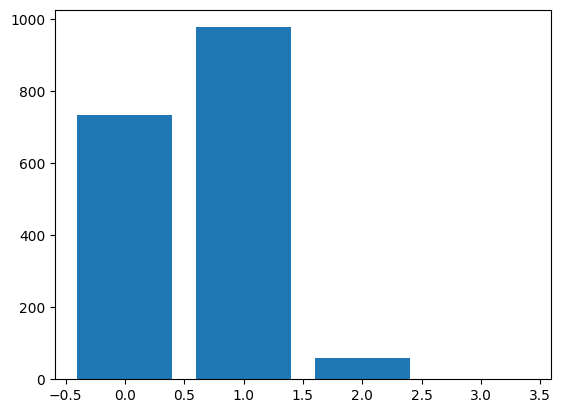

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df[[ 'ram_gb', 'ssd', 'hdd', 'display_size']]
y = df['price']

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit_transform(X, y)
for i in range(len(fs.scores_)):
  print('Scores %d: %f' % (i, fs.scores_[i]))
#Para mostrar
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Lo que se puede observar es que el tamaño de la pantalla no tiene nada que ver y que la **ram_gb** y la memoria **ssd** puede tener cierta relación con el precio.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Feature 0: procesor_br: _amd, Score: 1.123887
Feature 1: procesor_br: _intel, Score: 1.265105
Feature 2: procesor_br: _m1, Score: 1.894002
Feature 3: marca: _acer, Score: 0.912687
Feature 4: marca: _apple, Score: 2.461508
Feature 5: marca: _asus, Score: 0.850095
Feature 6: marca: _avita, Score: 2.249612
Feature 7: marca: _dell, Score: 1.317146
Feature 8: marca: _hp, Score: 1.140093
Feature 9: marca: _lenovo, Score: 1.064346
Feature 10: marca: _microsoft, Score: 0.730612
Feature 11: marca: _msi, Score: 0.812489
Feature 12: marca: _samsung, Score: 0.233272
Feature 13: marca: _toshiba, Score: 2.367582
Feature 14: os: _chrome os, Score: 1.983104
Feature 15: os: _dos, Score: inf
Feature 16: os: _linux, Score: 1.668496
Feature 17: os: _mac, Score: 2.461508
Feature 18: os: _no os, Score: 0.999300
Feature 19: os: _windows, Score: 1.713318
Feature 20: os: _windows s, Score: 0.955587
Feature 21: procesador_nombre: _apu dual, Score: inf
Feature 22: procesador_nombre: _athlon dual, Score: inf
Feat

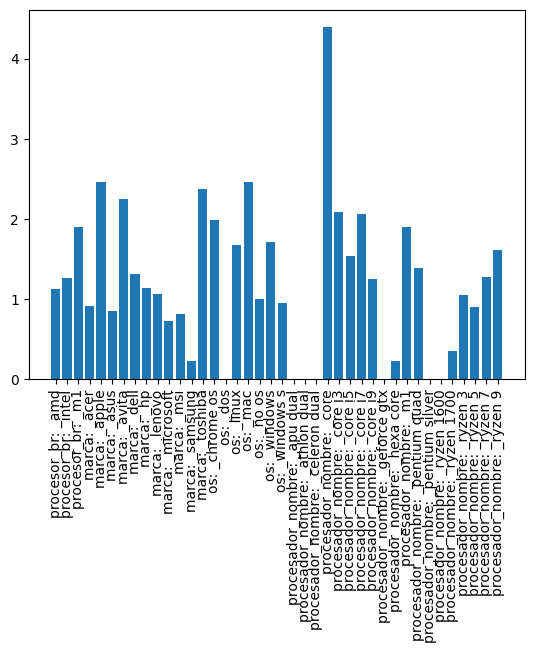

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

# Define feature selection
fs = SelectKBest(score_func=f_classif, k=2)

X = df[['procesor_br: _amd',
       'procesor_br: _intel', 'procesor_br: _m1', 'marca: _acer',
       'marca: _apple', 'marca: _asus', 'marca: _avita', 'marca: _dell',
       'marca: _hp', 'marca: _lenovo', 'marca: _microsoft', 'marca: _msi',
       'marca: _samsung', 'marca: _toshiba', 'os: _chrome os', 'os: _dos',
       'os: _linux', 'os: _mac', 'os: _no os', 'os: _windows',
       'os: _windows s', 'procesador_nombre: _apu dual',
       'procesador_nombre: _athlon dual', 'procesador_nombre: _celeron dual',
       'procesador_nombre: _core', 'procesador_nombre: _core i3',
       'procesador_nombre: _core i5', 'procesador_nombre: _core i7',
       'procesador_nombre: _core i9', 'procesador_nombre: _geforce gtx',
       'procesador_nombre: _hexa core', 'procesador_nombre: _m1',
       'procesador_nombre: _pentium quad',
       'procesador_nombre: _pentium silver', 'procesador_nombre: _ryzen 1600',
       'procesador_nombre: _ryzen 1700', 'procesador_nombre: _ryzen 3',
       'procesador_nombre: _ryzen 5', 'procesador_nombre: _ryzen 7',
       'procesador_nombre: _ryzen 9']]

y = df['price']

# Apply feature selection
fs.fit_transform(X, y)

# Imprime los nombres de las características seleccionadas junto con sus puntajes
for i, column_name in enumerate(X.columns):
    print('Feature %d: %s, Score: %f' % (i, column_name, fs.scores_[i]))

# Para mostrar los puntajes en un gráfico de barras
plt.bar(X.columns, fs.scores_)
plt.xticks(rotation='vertical')
plt.show()


Elimino las columnas con valores inf ya que solo van a dar problemas

In [ ]:
columnas_eliminar=['os: _dos', 'procesador_nombre: _apu dual',
       'procesador_nombre: _athlon dual', 'procesador_nombre: _celeron dual',
       'procesador_nombre: _geforce gtx', 'procesador_nombre: _pentium silver',
       'procesador_nombre: _ryzen 1600']
df.drop(columnas_eliminar, axis=1)

,ram_gb,ssd,hdd,display_size,price,procesor_br: _amd,procesor_br: _intel,procesor_br: _m1,marca: _acer,marca: _apple,...,procesador_nombre: _core i7,procesador_nombre: _core i9,procesador_nombre: _hexa core,procesador_nombre: _m1,procesador_nombre: _pentium quad,procesador_nombre: _ryzen 1700,procesador_nombre: _ryzen 3,procesador_nombre: _ryzen 5,procesador_nombre: _ryzen 7,procesador_nombre: _ryzen 9
5,8,256,0,14.0,24990.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,1024,14.0,20900.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,32,32,0,14.0,26899.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,0,1024,15.6,34649.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,4,0,1024,15.6,39999.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2,32,0,11.6,11135.5200,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2187,4,0,500,15.6,38378.6496,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2190,4,128,0,14.0,33992.6400,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2193,2,64,0,14.0,12201.1200,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ejecutar y testear modelo


In [ ]:
X = df.drop("price", axis=1)
y = df["price"]

In [ ]:
# importación de método
from sklearn.model_selection import train_test_split

2 splits

In [ ]:
train_ratio = 0.80
test_ratio = 0.20

In [ ]:
# train_test_split se utiliza para dividir un conjunto en dos partes
# shuffle "baraja las cartas" para que no haya sesgo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=True, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

He optado por el Linear Regresión porque es el que hemos empleado en clase.

In [ ]:
from sklearn import metrics
y_test_pred= model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))

Mean Absolute Error: 13632.762179388408
Mean Squared Error: 331886952.44639164


MEDIR R2 Y MEAN ABSTOLUTING PERCENT ERROR


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
# Imprimir resultados
print('R2 Score:', r2_score(y_test, y_test_pred)) # Mido la calidad de mi modelo
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_test_pred)) #

R2 Score: 0.6268234723630963
Mean Absolute Percentage Error: 0.24651340658170268


Para ser el primer modelo no parece malo, y el error absoluto quizás es mejorable.

In [ ]:
from sklearn import metrics

y_pred_train = model.predict(X_train) # predicción del modelo de datos X_train
y_pred_test = model.predict(X_test) # predicción del modelo de datos X_test

print('Mean Absolute Error (Train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error (Train):', metrics.mean_squared_error(y_train, y_pred_train))
print("---------------------------")
print('Mean Absolute Error (Test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (Test):', metrics.mean_squared_error(y_test, y_pred_test))


Mean Absolute Error (Train): 12942.085535142562
Mean Squared Error (Train): 313758791.2444977
---------------------------
Mean Absolute Error (Test): 13632.762179388408
Mean Squared Error (Test): 331886952.44639164


Comparando los valores se puede ver que los conjuntos de pruebas son un poco más mayores que los de entrenamienot.

## Visualización

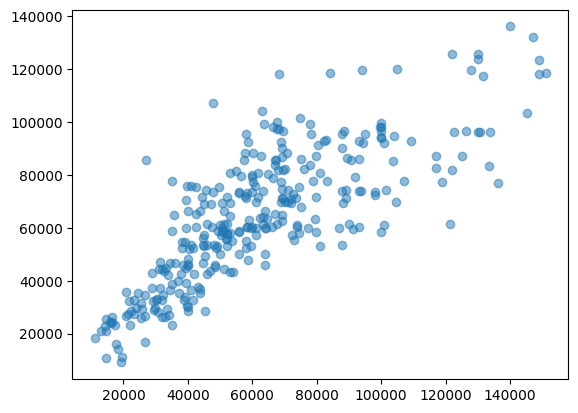

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred, alpha=0.5) # los datos serán representados con una transparencia del 50%
# El eje X es y_test y el y y_pred

La gráfica es mejorable, ya que no representa una línea recta decente, pero para ser el primer modelo me va a ayudar para el siguiente.

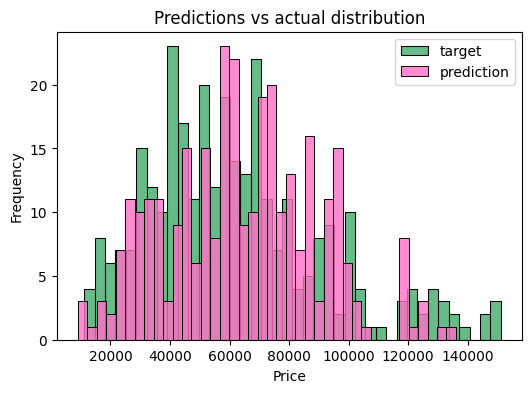

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#008f39', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#ff70c6', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

Sobre el histograma podemos observar que entre las barras de target y prediction hay gran similitud, lo que significa que tienen una distribución parecida a los valores reales.

##Inferencias

Puebo el modelo con datos reales:

In [ ]:
#Por ejemplo el primer elemento del test tiene estas características
print('precio normalizado:',X_test.iloc[0] )

precio normalizado: ram_gb                                  4.0
ssd                                   128.0
hdd                                     0.0
display_size                           14.0
procesor_br: _amd                       0.0
procesor_br: _intel                     1.0
procesor_br: _m1                        0.0
marca: _acer                            0.0
marca: _apple                           0.0
marca: _asus                            0.0
marca: _avita                           0.0
marca: _dell                            1.0
marca: _hp                              0.0
marca: _lenovo                          0.0
marca: _microsoft                       0.0
marca: _msi                             0.0
marca: _samsung                         0.0
marca: _toshiba                         0.0
os: _chrome os                          0.0
os: _dos                                0.0
os: _linux                              0.0
os: _mac                                0.0
os: _no os  

In [ ]:
#Y este precio
y_test.iloc[0]

39207.1536

MODELO 2
----------


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crear una instancia del modelo Random Forest
model = RandomForestRegressor(random_state=0)


In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn import metrics
y_test_pred= model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))

Mean Absolute Error: 13476.529670990345
Mean Squared Error: 363185009.0455717


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Imprimir resultados
print('R2 Score:', r2_score(y_test, y_test_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_test_pred))

R2 Score: 0.591631669861153
Mean Absolute Percentage Error: 0.23184219392098468


In [ ]:

from sklearn import metrics

# Supongamos que ya has entrenado tu modelo y obtenido las predicciones para los conjuntos de entrenamiento y prueba
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Mean Absolute Error (Train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error (Train):', metrics.mean_squared_error(y_train, y_pred_train))

print('Mean Absolute Error (Test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (Test):', metrics.mean_squared_error(y_test, y_pred_test))


Mean Absolute Error (Train): 7086.002362835303
Mean Squared Error (Train): 117812442.63876565
Mean Absolute Error (Test): 13476.529670990345
Mean Squared Error (Test): 363185009.0455717


VISUALIZACIÓN

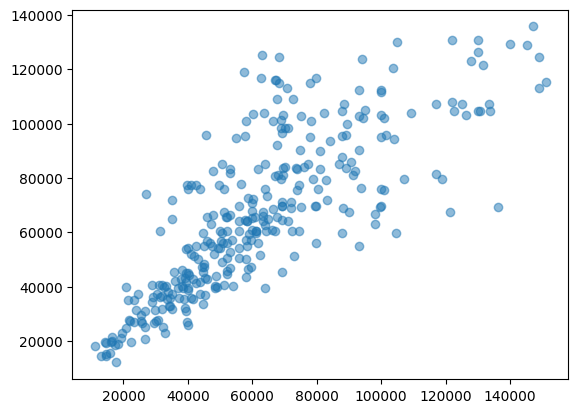

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred, alpha=0.5)

A diferencia del anterior se puede ver que hay una línea más recta y, es cierto, que tiene datos más dispersos.

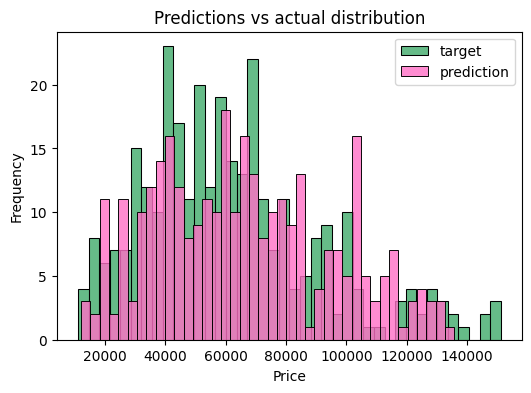

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#008f39', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#ff70c6', alpha=0.8, bins=40)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

Al parecer la relación de las variables del histograma son bastante similares.

In [ ]:
#Por ejemplo el primer elemento del test tiene estas características
print('precio normalizado:',X_test.iloc[0] )

precio normalizado: ram_gb                                  4.0
ssd                                   128.0
hdd                                     0.0
display_size                           14.0
procesor_br: _amd                       0.0
procesor_br: _intel                     1.0
procesor_br: _m1                        0.0
marca: _acer                            0.0
marca: _apple                           0.0
marca: _asus                            0.0
marca: _avita                           0.0
marca: _dell                            1.0
marca: _hp                              0.0
marca: _lenovo                          0.0
marca: _microsoft                       0.0
marca: _msi                             0.0
marca: _samsung                         0.0
marca: _toshiba                         0.0
os: _chrome os                          0.0
os: _dos                                0.0
os: _linux                              0.0
os: _mac                                0.0
os: _no os  

In [ ]:
#Y este precio
y_test.iloc[0]

39207.1536

In [ ]:
#Hace una predicción del modelo (model) para la primera observación en tu conjunto de prueba (X_test). Este código te da la predicción específica del modelo para esa única observación en el conjunto de prueba.
model.predict(X_test.iloc[[0]])


array([32164.50384])

Mejora 1
---------



Para realizar esta mejora he elegido las mejores columnas. Para ello voy a realizar otro modelo tambien para ver si mejora algo.

In [ ]:
X=['ram_gb', 'ssd', 'marca: _apple', 'marca: _avita','marca: _toshiba', 'procesador_nombre: _core', 'procesador_nombre: _core i3', 'procesador_nombre: _core i7', 'os: _mac']
y=['price']


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Crear una instancia del modelo Decision Tree
model =  DecisionTreeRegressor(random_state=0)

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)

In [ ]:
# Imprimo las métricas de evaluación
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', r2_score(y_test, y_test_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_test_pred))


Mean Absolute Error: 13645.29892469581
Mean Squared Error: 388638540.32482576
R2 Score: 0.5630115016114727
Mean Absolute Percentage Error: 0.2345749126733824


VISUALIZACIÓN

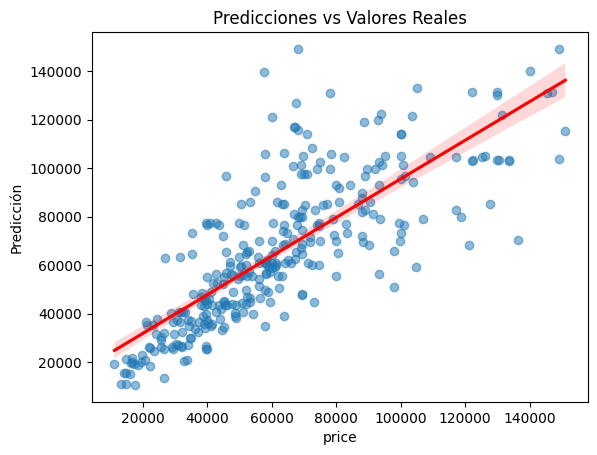

In [ ]:
import seaborn as sns

# Visualizar las predicciones vs valores reales
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Añadir una línea de tendencia
sns.regplot(x=y_test, y=y_test_pred, scatter=False, color='red')

plt.show()


Vemos que muchas predicciones concuerdan perfetamente con el precio real

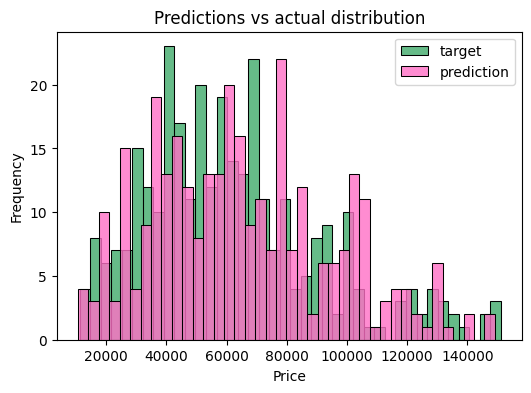

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#008f39', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#ff70c6', alpha=0.8, bins=40)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
#Por ejemplo el primer elemento del test tiene estas características
print('precio normalizado:',X_test.iloc[0] )

precio normalizado: ram_gb                                  4.0
ssd                                   128.0
hdd                                     0.0
display_size                           14.0
procesor_br: _amd                       0.0
procesor_br: _intel                     1.0
procesor_br: _m1                        0.0
marca: _acer                            0.0
marca: _apple                           0.0
marca: _asus                            0.0
marca: _avita                           0.0
marca: _dell                            1.0
marca: _hp                              0.0
marca: _lenovo                          0.0
marca: _microsoft                       0.0
marca: _msi                             0.0
marca: _samsung                         0.0
marca: _toshiba                         0.0
os: _chrome os                          0.0
os: _dos                                0.0
os: _linux                              0.0
os: _mac                                0.0
os: _no os  

In [ ]:
#Y este precio
y_test.iloc[0]

39207.1536

In [ ]:
#Hace una predicción del modelo (model) para la primera observación en tu conjunto de prueba (X_test). Este código te da la predicción específica del modelo para esa única observación en el conjunto de prueba.
model.predict(X_test.iloc[[0]])


array([33886.08])

Mejora 2
------------

In [ ]:
df.dtypes


ram_gb                                  int64
ssd                                     int64
hdd                                     int64
display_size                          float64
price                                 float64
procesor_br: _amd                       uint8
procesor_br: _intel                     uint8
procesor_br: _m1                        uint8
marca: _acer                            uint8
marca: _apple                           uint8
marca: _asus                            uint8
marca: _avita                           uint8
marca: _dell                            uint8
marca: _hp                              uint8
marca: _lenovo                          uint8
marca: _microsoft                       uint8
marca: _msi                             uint8
marca: _samsung                         uint8
marca: _toshiba                         uint8
os: _chrome os                          uint8
os: _dos                                uint8
os: _linux                        

Para la segunda mejora voy hacer una normalización de los valores númericos.

In [ ]:
from scipy.stats import zscore

# Identificar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Aplicar z-score solo a las columnas numéricas
df[columnas_numericas].apply(zscore)

,ram_gb,ssd,hdd,display_size,price
5,-0.140492,-0.076559,-0.713860,-0.665160,-1.205652
6,-0.974753,-1.089644,1.293386,-0.665160,-1.335880
8,4.865073,-0.963008,-0.713860,-0.665160,-1.144868
10,-0.974753,-1.089644,1.293386,0.286098,-0.898103
12,-0.974753,-1.089644,1.293386,0.286098,-0.727756
...,...,...,...,...,...
2184,-1.391883,-0.963008,-0.713860,-2.092048,-1.646788
2187,-0.974753,-1.089644,0.266241,0.286098,-0.779349
2190,-0.974753,-0.583101,-0.713860,-0.665160,-0.919002
2193,-1.391883,-0.836373,-0.713860,-0.665160,-1.612858


In [ ]:
X=['ram_gb',	'ssd'	,'hdd'	,'display_size']
y=['price']

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Crear una instancia del modelo Decision Tree
model =  DecisionTreeRegressor(random_state=0)

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)

In [ ]:
# Imprimir métricas de evaluación
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', r2_score(y_test, y_test_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_test_pred))


Mean Absolute Error: 13645.29892469581
Mean Squared Error: 388638540.32482576
R2 Score: 0.5630115016114727
Mean Absolute Percentage Error: 0.2345749126733824


VISUALIZACION

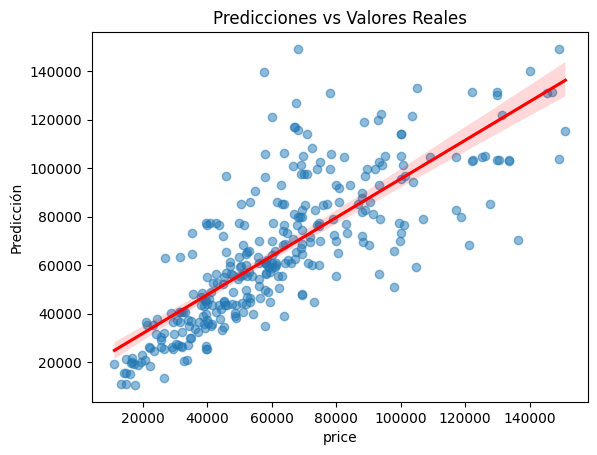

In [ ]:
import seaborn as sns

# Visualizar las predicciones vs valores reales
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Añadir una línea de tendencia
sns.regplot(x=y_test, y=y_test_pred, scatter=False, color='red')

plt.show()


Vemos que muchas predicciones concuerdan perfetamente con el precio real

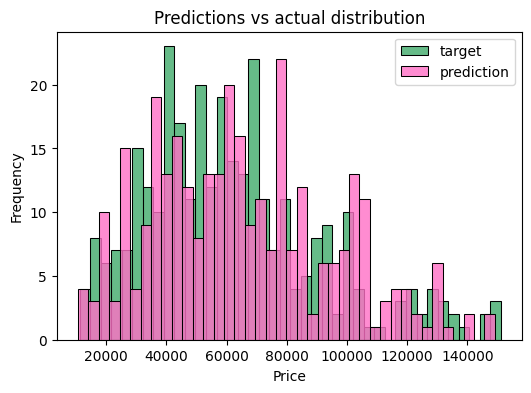

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='#008f39', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#ff70c6', alpha=0.8, bins=40)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
#Por ejemplo el primer elemento del test tiene estas características
print('precio normalizado:',X_test.iloc[0] )

precio normalizado: ram_gb                                  4.0
ssd                                   128.0
hdd                                     0.0
display_size                           14.0
procesor_br: _amd                       0.0
procesor_br: _intel                     1.0
procesor_br: _m1                        0.0
marca: _acer                            0.0
marca: _apple                           0.0
marca: _asus                            0.0
marca: _avita                           0.0
marca: _dell                            1.0
marca: _hp                              0.0
marca: _lenovo                          0.0
marca: _microsoft                       0.0
marca: _msi                             0.0
marca: _samsung                         0.0
marca: _toshiba                         0.0
os: _chrome os                          0.0
os: _dos                                0.0
os: _linux                              0.0
os: _mac                                0.0
os: _no os  

In [ ]:
#Y este precio
y_test.iloc[0]

39207.1536

In [ ]:
#Hace una predicción del modelo (model) para la primera observación en tu conjunto de prueba (X_test). Este código te da la predicción específica del modelo para esa única observación en el conjunto de prueba.
model.predict(X_test.iloc[[0]])


array([33886.08])